In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('placedata v2.0 synthetic.csv')
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [3]:
data['PlacementStatus'] = [0 if x == 'NotPlaced' else 1 for x in data['PlacementStatus']]
data['ExtracurricularActivities'] = [0 if x == 'No' else 1 for x in data['ExtracurricularActivities']]
data['PlacementTraining'] = [0 if x == 'No' else 1 for x in data['PlacementTraining']]
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  int64  
 8   PlacementTraining          10000 non-null  int64  
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [5]:
data.isna().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [6]:
data.set_index('StudentID', inplace=True)

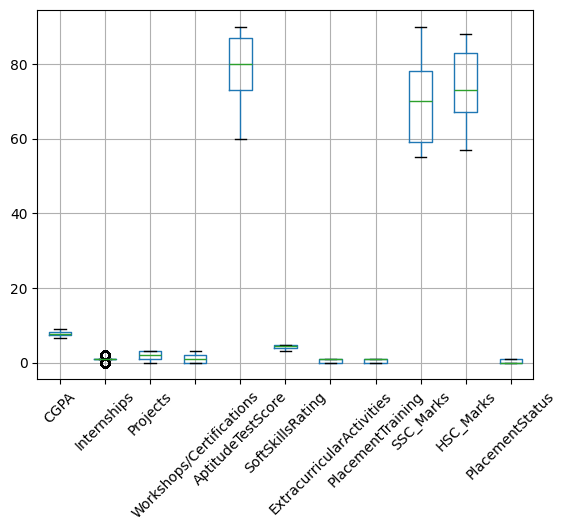

In [7]:
data.boxplot(rot=45)
plt.show()

In [8]:
# Calculate and display the range of the 'Internships' column
min_internships = data['Internships'].min()
max_internships = data['Internships'].max()
print(f'Range of Internships column: {min_internships} to {max_internships}')

Range of Internships column: 0 to 2


In [9]:
feature_cols = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating']
X = data[feature_cols]
y = data.PlacementStatus


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=16)

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [12]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[985, 187],
       [237, 591]])

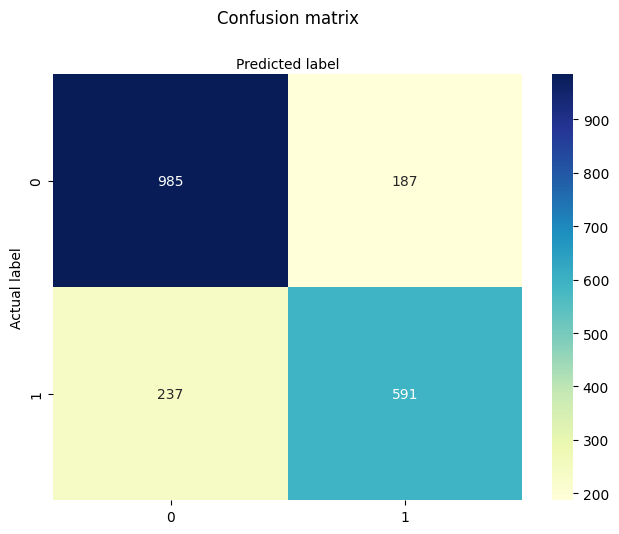

In [13]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

# Text(0.5,257.44,'Predicted label');

In [14]:
from sklearn.metrics import classification_report
target_names = ['not placed', 'placed']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  not placed       0.81      0.84      0.82      1172
      placed       0.76      0.71      0.74       828

    accuracy                           0.79      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000



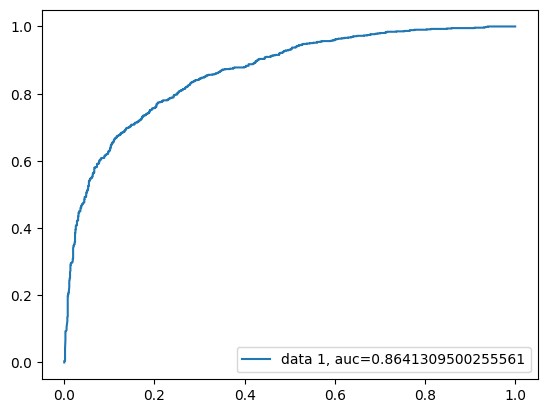

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [16]:
# Make predictions using the trained model
sample_data = [[8.5, 2, 3, 5, 75, 4]]  # Example input: [CGPA, Internships, Projects, Workshops/Certifications, AptitudeTestScore, SoftSkillsRating]
predicted_class = logreg.predict(sample_data)
predicted_probability = logreg.predict_proba(sample_data)[0][1]
print(f'Predicted Class: {predicted_class[0]}')
print(f'Probability of Placement: {predicted_probability:.2f}')

Predicted Class: 1
Probability of Placement: 0.71


C:\Users\Vidit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vidit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [17]:
# Extensive test cases for the model
import pandas as pd

test_cases = [
    [10.0, 5, 6, 8, 95, 5],  # Perfect profile with maximum scores
    [5.0, 0, 0, 0, 30, 1],  # Worst possible profile
    [7.5, 3, 4, 5, 70, 4],  # Strong profile with balanced extracurriculars
    [8.0, 2, 3, 4, 75, 3],  # Above average CGPA with moderate extracurriculars
    [6.0, 1, 1, 1, 50, 2],  # Low CGPA with minimal extracurriculars
    [9.0, 4, 5, 7, 85, 5],  # Excellent CGPA with strong extracurriculars
    [7.0, 0, 0, 2, 60, 3],  # Average CGPA with no internships but some certifications
    [8.5, 3, 4, 6, 80, 4],  # Strong profile with good extracurriculars
    [6.5, 0, 0, 0, 45, 1],  # Low CGPA with no extracurriculars
    [9.5, 5, 6, 8, 90, 5],  # Excellent profile with high scores
    [5.5, 0, 1, 1, 35, 1],  # Poor CGPA with minimal extracurriculars
    [8.2, 2, 3, 4, 78, 4],  # Above average profile with balanced extracurriculars
    [7.8, 1, 2, 3, 68, 3],  # Average profile with some extracurriculars
    [6.2, 0, 0, 1, 48, 2],  # Low CGPA with minimal certifications
    [9.8, 4, 5, 7, 88, 5],  # Near-perfect profile with strong extracurriculars
    [7.0, 2, 3, 4, 65, 3],  # Average profile with moderate extracurriculars
    [8.7, 3, 4, 5, 82, 4],  # Strong profile with good CGPA and extracurriculars
    [5.8, 0, 0, 0, 38, 1],  # Very poor profile with no extracurriculars
    [9.2, 5, 6, 8, 92, 5],  # Excellent profile with maximum extracurriculars
    [6.8, 1, 2, 2, 55, 2]   # Below average profile with minimal extracurriculars
]

columns = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating']
results = []

for case in test_cases:
    predicted_class = logreg.predict([case])[0]
    predicted_probability = logreg.predict_proba([case])[0][1]
    results.append(case + [predicted_class, round(predicted_probability, 2)])

results_df = pd.DataFrame(results, columns=columns + ['Predicted Class', 'Probability of Placement'])
print(results_df)
results_df

    CGPA  Internships  Projects  Workshops/Certifications  AptitudeTestScore  \
0   10.0            5         6                         8                 95   
1    5.0            0         0                         0                 30   
2    7.5            3         4                         5                 70   
3    8.0            2         3                         4                 75   
4    6.0            1         1                         1                 50   
5    9.0            4         5                         7                 85   
6    7.0            0         0                         2                 60   
7    8.5            3         4                         6                 80   
8    6.5            0         0                         0                 45   
9    9.5            5         6                         8                 90   
10   5.5            0         1                         1                 35   
11   8.2            2         3         

C:\Users\Vidit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vidit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vidit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vidit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vidit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid featu

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,Predicted Class,Probability of Placement
0,10.0,5,6,8,95,5,1,1.00
1,5.0,0,0,0,30,1,0,0.00
2,7.5,3,4,5,70,4,1,0.61
3,8.0,2,3,4,75,3,0,0.36
4,6.0,1,1,1,50,2,0,0.00
5,9.0,4,5,7,85,5,1,0.99
6,7.0,0,0,2,60,3,0,0.01
7,8.5,3,4,6,80,4,1,0.90
8,6.5,0,0,0,45,1,0,0.00
9,9.5,5,6,8,90,5,1,1.00


In [18]:
def predict_placement(CGPA, Internships, Projects, Workshops_Certifications, AptitudeTestScore, SoftSkillsRating):
    """
    Predict placement status and probability based on input parameters.
    Parameters:
        CGPA (float): Cumulative Grade Point Average
        Internships (int): Number of internships
        Projects (int): Number of projects
        Workshops_Certifications (int): Number of workshops or certifications
        AptitudeTestScore (int): Aptitude test score
        SoftSkillsRating (int): Soft skills rating
    Returns:
        tuple: Predicted class (int) and probability of placement (float)
    """
    input_data = [[CGPA, Internships, Projects, Workshops_Certifications, AptitudeTestScore, SoftSkillsRating]]
    predicted_class = logreg.predict(input_data)[0]
    predicted_probability = logreg.predict_proba(input_data)[0][1]
    return predicted_class, round(predicted_probability, 2)

In [19]:
import joblib

# Save the trained model to a file
joblib.dump(logreg, 'placement_predictor_model.pkl')
print('Model saved as placement_predictor_model.pkl')

Model saved as placement_predictor_model.pkl


In [20]:
# Load the trained model from the file
loaded_model = joblib.load('placement_predictor_model.pkl')
print('Model loaded successfully')

# Example usage of the loaded model
sample_data = [[8.5, 2, 3, 5, 75, 4]]
predicted_class = loaded_model.predict(sample_data)[0]
predicted_probability = loaded_model.predict_proba(sample_data)[0][1]
print(f'Predicted Class: {predicted_class}')
print(f'Probability of Placement: {predicted_probability:.2f}')

Model loaded successfully
Predicted Class: 1
Probability of Placement: 0.71


C:\Users\Vidit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Vidit\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
